In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.cm as cm


In [2]:
filenamein="Dog.png"
BALL_RADIUS = 20.0        # FOR ballS IN PIXELS
pix_to_m=45.0
freq=3e10               # Frequency
wavel=3e8/freq          # Wavelength
dec_ang=90.0            # Declination angle of 'source'
sin_dec=np.sin((dec_ang * np.pi)/ 180.) #sin of dec
col_map=cm.gist_gray

In [52]:
WIDTH, HEIGHT=(2000,2000)

In [53]:
WIDTH_ANT= WIDTH/2.5
HEIGHT_ANT= WIDTH/2.5
Y_UPOUT=BALL_RADIUS*1.5                    # TOP BOUNDARY
Y_DOWNOUT=HEIGHT_ANT-(BALL_RADIUS*1.5)

In [54]:
in_img=mpimg.imread(filenamein) #gif_image
in_img=in_img[:,:,1] #select a single colour plane from a RBG image
img_siz=in_img.shape #input image dimensions

In [55]:
pix_to_uv=150.0*(2.68*(WIDTH_ANT/600.0))
umax=1.5*(((HEIGHT_ANT-(2.0*1.5*BALL_RADIUS))*pix_to_m*10.0)/wavel)#maximum for earth rot at HA 60
vmax=1.5*((1.0*(WIDTH_ANT-(2.0*1.5*BALL_RADIUS))*pix_to_m*10.0*sin_dec)/wavel)

In [56]:
synthesis_type=0
arrType = 'AlmaL'
almal_x=[  5.37451571e-01,   5.85665088e-01,   5.10331468e-01,   4.71301478e-01,
   5.79351413e-01,   5.85378103e-01,   4.60539532e-01,   6.41196728e-01,
   4.89883771e-01,   5.42545559e-01,   6.35241785e-01,   4.30477830e-01,
   6.49591046e-01,   5.21236906e-01,   4.67498924e-01,   5.42473813e-01,
   5.80212369e-01,   5.10546707e-01,   7.17247812e-01,   4.68869278e-01,
   3.33405080e-01,   7.67097144e-01,   6.71990243e-01,   3.54763955e-01,
   8.33003300e-01,   8.17692639e-01,   2.09212226e-01,   8.00107619e-01,
   8.20261157e-01,   8.25599082e-01,   7.99655618e-01,   8.36131439e-01,
   9.00000000e-01,   8.05997991e-01,   9.29939733e-01,   4.33053523e-01,
   4.14542976e-01,   2.38699957e-01,   7.21337351e-01,   8.64930406e-01,
   9.34926101e-01,   8.50631367e-01,   8.47610850e-02,   7.88556464e-01,
   9.05294877e-01,   1.04749605e-01,   8.30750466e-01,   1.00000000e+00,
   7.17463000e-05,   9.46039604e-01]
almal_y=[  3.46786220e-01,   4.03165015e-01,   3.96935661e-01,   4.30033034e-01,
   3.05257197e-01,   4.69170993e-01,   3.39361334e-01,   3.60251691e-01,
   4.63193330e-01,   2.84681454e-01,   4.60613497e-01,   3.78121756e-01,
   3.09284254e-01,   5.12587699e-01,   3.12493314e-01,   3.49114362e-01,
   4.05493157e-01,   4.02158251e-01,   5.22214881e-01,   6.07028473e-01,
   5.14475381e-01,   5.49548529e-01,   2.14661004e-01,   5.16759478e-01,
   2.61249017e-01,   5.25046406e-01,   5.02834670e-01,   6.29228000e-05,
   7.18754129e-01,   5.51838918e-01,   2.49690105e-01,   5.85955639e-01,
   2.60154161e-01,   5.47698600e-01,   9.01720938e-01,   6.35840805e-01,
   6.43920088e-01,   5.07365109e-01,   1.13474910e-01,   6.04970898e-01,
   4.29322010e-02,   6.24338524e-01,   5.01129464e-01,   4.94069530e-02,
   7.89592575e-01,   4.61997798e-01,   6.77401290e-01,   2.09721570e-02,
   4.20342929e-01,   1.00000000e+00]
rescaleFact=(Y_DOWNOUT-Y_UPOUT)*0.95

In [57]:
BALLS = 50 #always start with 50 antenna

In [58]:
if arrType == 'AlmaL':
    orig_x=almal_x[:BALLS]
    orig_y=almal_y[:BALLS]
    zoom_factor=1.0        
    sythesis_type=0
orig_x=(np.array(orig_x)*rescaleFact)+Y_UPOUT
orig_y=(np.array(orig_y)*rescaleFact)+Y_UPOUT

In [59]:
class Ball:
    #BALL_RADIUS = 15.0        # FOR ballS IN PIXELS
    def __init__(self,x,y):
         self.position = TwoD(x,y)

In [60]:
class TwoD:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

In [61]:
balls = tuple(Ball(orig_x[ball], orig_y[ball]) for ball in xrange(BALLS))

In [62]:
x_pos = tuple(ball.position.x for ball in balls)
y_pos = tuple(ball.position.y for ball in balls)

In [63]:
x=np.array(x_pos)
y=np.array(y_pos)

x=x*zoom_factor*pix_to_m
y=y*zoom_factor*pix_to_m

N=len(x)*(len(x)-1)                     #number of baselines

lx=np.zeros((len(x),len(x)))
ly=np.zeros((len(y),len(x)))

for i in range(len(x)):
    for j in range(len(y)):
        lx[i,j]=(x[i]-x[j])
        ly[i,j]=(y[i]-y[j])

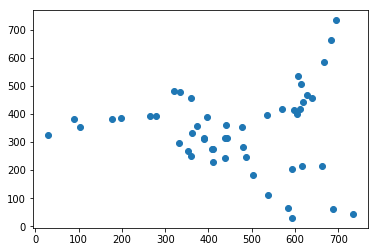

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_pos,y_pos)

In [65]:
u=(np.ceil(ly/wavel))                    # u values
typeused = "Snapshot        "            #long white space to overlay correctly
v=(np.ceil((-1.*lx*sin_dec)/wavel))      # v values

re_u=np.reshape(u,(len(x)**2),order='F') #reshape u into linear form
re_v=np.reshape(v,(len(y)**2),order='F') #reshape v into linear form

full_re_u=re_u
full_re_v=re_v

#--- rescale to image scale
full_re_uimg=(re_u/umax)*pix_to_uv
full_re_vimg=(re_v/vmax)*pix_to_uv

obs_uv_matrix=np.zeros(img_siz)          #create an empty matrix same size as in image for multiplying with fft of true sky image

for k in range(len(full_re_u)): 
    int_u=int(full_re_uimg[k])
    int_v=int(full_re_vimg[k])
    obs_uv_matrix[int_u,int_v]=1.0

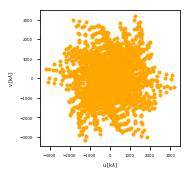

In [66]:
obs_uv_matrix[0,0]=0.0                   #fixes uv 0,0 to 0
fig_uv = plt.figure(8,figsize=[(2.68*((HEIGHT_ANT*(2./3.))/570)),(2.68*((WIDTH_ANT*(2./3.))/570))]) #Horrific aspect ratio hack... sorry!
fig_uv.clear()
ax_uv = fig_uv.add_subplot(111)
if synthesis_type == 0 or synthesis_type == 1:
    ax_uv.plot(full_re_u/1000.0,full_re_v/1000.0,'.',color='orange')#plot uv coverage
    #ax_uv.plot(0,0,'w.',mec='w')
ax_uv.tick_params(axis='both',labelsize='4')
ax_uv.set_xlabel('u [k$\lambda$]',size='5')
ax_uv.set_ylabel('v [k$\lambda$]',size='5')
fig_uv.savefig('uvplot.png', dpi=150, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format=None,
    transparent=False,bbox_inches='tight',pad_inches=0.05)

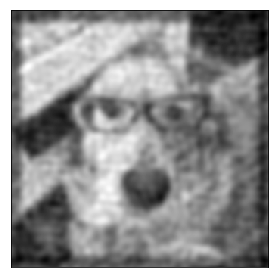

In [67]:
#---3 Do the maths ---#
#--Section 7 chapter 2 Synthesis imaging--#
fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting

fig_obs = plt.figure(4, figsize=[(2.68*(WIDTH_ANT/600.0)),(2.68*(WIDTH_ANT/600.0))]) #Horrific aspect ratio hack... sorry!
fig_obs.clear()
fig_obs.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax_obs=fig_obs.add_subplot(111)
if synthesis_type == 0 or synthesis_type ==1:
    ax_obs.imshow(real_ifft_img, cmap=col_map)                #Show observed version of input image.
    ax_obs.get_xaxis().set_visible(False)
    ax_obs.get_yaxis().set_visible(False)
    #plt.gca().invert_yaxis()
    fig_obs.savefig('output.png', dpi=150, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None, pad_inches=None)

In [ ]:
def synthType(sType,orig_x,orig_y,add_min):
    global synthesis_type, BALLS
    if sType == 'Earth' or sType == 'Snap':
        if BALLS==1:
            BALLS=2
            add_min=1
            build_balls()

    if sType == 'Snap':
        synthesis_type=0
    if sType == 'Earth':
        synthesis_type=1
    if sType == 'Single':
        synthesis_type=2
        BALLS=1
        add_min=1
        build_balls()

    balltext = str(BALLS) + " ant."
    
    updateStatus(4)

In [ ]:
global filenamein, col_map, x_pos, y_pos,  statusmsg

'''Calculates the uv data and simulated images!'''
in_img=mpimg.imread(filenamein) #gif_image
in_img=in_img[:,:,1] #select a single colour plane from a RBG image
img_siz=in_img.shape #input image dimensions

statusmsg = "Calc. UV"
updateStatus(3)

pix_to_uv=150.0*(2.68*(WIDTH_ANT/600.0))

umax=1.5*(((HEIGHT_ANT-(2.0*1.5*BALL_RADIUS))*pix_to_m*10.0)/wavel)#maximum for earth rot at HA 60
vmax=1.5*((1.0*(WIDTH_ANT-(2.0*1.5*BALL_RADIUS))*pix_to_m*10.0*sin_dec)/wavel)

if synthesis_type == 0 or synthesis_type ==1:    
    x=np.array(x_pos)
    y=np.array(y_pos)

    x=x*zoom_factor*pix_to_m
    y=y*zoom_factor*pix_to_m

    N=len(x)*(len(x)-1)                     #number of baselines

    lx=np.zeros((len(x),len(x)))
    ly=np.zeros((len(y),len(x)))

    for i in range(len(x)):
        for j in range(len(y)):
            lx[i,j]=(x[i]-x[j])
            ly[i,j]=(y[i]-y[j])

if synthesis_type == 0:                          #snapshot mode
    u=(np.ceil(ly/wavel))                    # u values
    typeused = "Snapshot        "            #long white space to overlay correctly
    v=(np.ceil((-1.*lx*sin_dec)/wavel))      # v values

    re_u=np.reshape(u,(len(x)**2),order='F') #reshape u into linear form
    re_v=np.reshape(v,(len(y)**2),order='F') #reshape v into linear form

    full_re_u=re_u
    full_re_v=re_v

    #--- rescale to image scale
    full_re_uimg=(re_u/umax)*pix_to_uv
    full_re_vimg=(re_v/vmax)*pix_to_uv

    obs_uv_matrix=np.zeros(img_siz)          #create an empty matrix same size as in image for multiplying with fft of true sky image

    for k in range(len(full_re_u)): 
        int_u=int(full_re_uimg[k])
        int_v=int(full_re_vimg[k])
        obs_uv_matrix[int_u,int_v]=1.0

elif synthesis_type == 1:                         #Earth Rotation mode

    ha_range=[0.,20.,40.,60.,80.,100.,120.,140.,160.,180.]
    typeused = "Earth Rotation"
    u=0
    v=0
    full_re_u=0
    full_re_v=0

    for ha in ha_range:

        sin_ha=np.sin((ha * np.pi)/ 180.)
        cos_ha=np.cos((ha * np.pi)/ 180.)
        u=(np.ceil((((lx*sin_ha)+(ly*cos_ha))/wavel)))                    # u values including ha
        v=(np.ceil(((-1.*lx*sin_dec*cos_ha)+(ly*sin_dec*sin_ha))/wavel)) # v values

        re_u=np.reshape(u,(len(x)**2),order='F') #reshape u into linear form
        re_v=np.reshape(v,(len(y)**2),order='F') #reshape v into linear form
        full_re_u=np.append(full_re_u,re_u)
        full_re_v=np.append(full_re_v,re_v)
        #--- rescale to image scale
    full_re_uimg=(full_re_u/umax)*pix_to_uv
    full_re_vimg=(full_re_v/vmax)*pix_to_uv


    obs_uv_matrix=np.zeros(img_siz) #create an empty matrix same size as in image for multiplying with fft of true sky image

    for k in range(len(full_re_uimg)):
        int_u=int(full_re_uimg[k])
        int_v=int(full_re_vimg[k])
        obs_uv_matrix[int_u,int_v]=1.0

elif synthesis_type == 2:                     #Single Dish
    size_gauss=1.22*(wavel/12.)
    gaussian=gauss_kern(img_siz[0]/2,img_siz[1]/2)
    typeused = "Single Ant.    " #long white space to overlay corre
    obs_uv_matrix=np.zeros(img_siz)
    singledish=signal.fftconvolve(in_img,gaussian, mode='same')

    full_re_u=np.arange((-12.0/wavel),(12.0/wavel),0.1)
    full_re_v=np.arange((-12.0/wavel),(12.0/wavel),0.1)

obs_uv_matrix[0,0]=0.0                   #fixes uv 0,0 to 0

fig_uv = plt.figure(8,figsize=[(2.68*((HEIGHT_ANT*(2./3.))/570)),(2.68*((WIDTH_ANT*(2./3.))/570))]) #Horrific aspect ratio hack... sorry!
fig_uv.clear()
ax_uv = fig_uv.add_subplot(111)
if synthesis_type == 0 or synthesis_type == 1:
    ax_uv.plot(full_re_u/1000.0,full_re_v/1000.0,'.',color='orange')#plot uv coverage
    #ax_uv.plot(0,0,'w.',mec='w')
elif synthesis_type == 2:
    circ=pyl.Circle((0,0),radius=1.2,color='orange')
    ax_uv.add_patch(circ)
    ax_uv.set_xlim(-100.0,100.0)
    ax_uv.set_ylim(-100.0,100.0)
ax_uv.tick_params(axis='both',labelsize='4')
ax_uv.set_xlabel('u [k$\lambda$]',size='5')
ax_uv.set_ylabel('v [k$\lambda$]',size='5')
fig_uv.savefig('imgs/uvplot.png', dpi=150, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format=None,
    transparent=False,bbox_inches='tight',pad_inches=0.05)

#---3 Do the maths ---#
#--Section 7 chapter 2 Synthesis imaging--#
fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting

fig_obs = plt.figure(4, figsize=[(2.68*(WIDTH_ANT/600.0)),(2.68*(WIDTH_ANT/600.0))]) #Horrific aspect ratio hack... sorry!
fig_obs.clear()
fig_obs.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax_obs=fig_obs.add_subplot(111)
if synthesis_type == 0 or synthesis_type ==1:
    ax_obs.imshow(real_ifft_img, cmap=col_map)                #Show observed version of input image.
    ax_obs.get_xaxis().set_visible(False)
    ax_obs.get_yaxis().set_visible(False)
    #plt.gca().invert_yaxis()
    fig_obs.savefig('imgs/output.png', dpi=150, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None, pad_inches=None)
    statusmsg = "Done: " + str(typeused)
    updateStatus(3)
elif synthesis_type == 2:
    ax_obs.imshow(singledish, cmap=col_map)                #Show observed version of input image.
    ax_obs.get_xaxis().set_visible(False)
    ax_obs.get_yaxis().set_visible(False)
    #plt.gca().invert_yaxis()
    fig_obs.savefig('imgs/output.png', dpi=150, facecolor='w', edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches=None, pad_inches=None)
    statusmsg = "Done: " + str(typeused)
    updateStatus(3)